In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# from textblob import Word, TextBlob

import requests
from PIL import Image
from io import BytesIO

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
stop = open('stop_words_english.txt', 'r')
stop = [line[:-1] for line in stop.readlines()]

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/" \
    "master/data/2020/2020-09-29/taylor_swift_lyrics.csv"
    )

In [4]:
df.columns = [i.rstrip() for i in df.columns]
df.Title = [i.rstrip() for i in df.Title]
df.Album = [i.rstrip() for i in df.Album]

In [62]:
t5 = [
      'Cold As You',
      'White Horse',
      'All You Had to Do Was Stay',
      'Delicate',
      'The Archer',
      'my tear ricochet',
      'Dear John',
      'All Too Well'
      ]

In [63]:
df['Track5'] = np.where(
    df.Title.isin(t5),1,0
    )

In [7]:
def sentiment(df,stop):
  lyrics = df[['Lyrics']].copy()
  lyrics = lyrics.loc[lyrics.Lyrics.isna() == False]
  lyrics['length_words'] = lyrics['Lyrics'].apply(lambda x: len(x.split()))
  lyrics['char_count'] = lyrics['Lyrics'].apply(lambda x: len(x))
  def avg_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)
  lyrics['average_word_length'] = lyrics['Lyrics'].apply(lambda x: avg_words(x))
  # stop_words = stopwords.words('english')
  lyrics['stop'] = lyrics['Lyrics'].apply(lambda x: len([word for word in x.split() if word.lower() in stop]))
  lyrics['stop_rate'] = lyrics['stop'] / lyrics['length_words']
  lyrics['Lyrics_cleaned'] = lyrics['Lyrics'].apply(lambda x: " ".join(word.lower() for word in x.split()))
  lyrics['Lyrics_cleaned'] = lyrics['Lyrics_cleaned'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop))
  stop_ = ['my','me','wanna','cause','once','you',"gonna",'eh','ha','uh','ah','ey','ooh','oh','it','yet',
           'shouldve','baby','yeah','man','oohah','ohoh','time','uhey','knew','wouldve','want','off','matter']
  lyrics['Lyrics_cleaned'] = lyrics['Lyrics_cleaned'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_))
  lyrics['Lyrics_cleaned'] = lyrics['Lyrics_cleaned'].str.replace('[^\w\s]','')
  # lyrics['Lyrics_cleaned'] = lyrics['Lyrics_cleaned'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
  # lyrics['polarity'] = lyrics['Lyrics_cleaned'].apply(lambda x: TextBlob(x).sentiment[0])
  # lyrics['subjectivity'] = lyrics['Lyrics_cleaned'].apply(lambda x: TextBlob(x).sentiment[1])
  return lyrics

In [ ]:
cleaned = sentiment(df,stop)

In [10]:
# cleaned['Lyrics_cleaned'] = cleaned['Lyrics_cleaned'].apply(lambda x: ' '.join(word for word in x.split() if word not in ['my','me','wanna','cause','once','you',"gonna",'eh','ha','uh','ah','ey','ooh','oh','it','yet','shouldve','baby','yeah','man','oohah','ohoh','time','uhey','knew','wouldve','want','off','matter']))

In [14]:
merged = pd.merge(df,cleaned,on='Lyrics')

In [16]:
album_lyrics = pd.DataFrame(merged.groupby('Album')['Lyrics_cleaned'].apply(' '.join))

In [17]:
album_lyrics_list = list(album_lyrics.Lyrics_cleaned)

In [18]:
tfidf=TfidfVectorizer(use_idf=True) 
vectors=tfidf.fit_transform(album_lyrics.Lyrics_cleaned)

In [229]:
album_lyrics

,Lyrics_cleaned
Album,
1989,walkin crowd village glow kaleidoscope loud he...
Fearless,sound morning phone warning realize laugh soun...
Lover,days spend thinkin bout wrong wrong wrong live...
Red,walking fast traffic lights busy streets busy ...
Speak Now,oh oh oh oh college working parttime waiting t...
Taylor Swift,blue eyes shinx georgia stars shame night said...
folklore,good shit yes no thought bus stop hit ground r...
reputation,knew killer time girls loved left haunted ghos...


In [19]:
# get the first vector out (for the first document) 
# could have just looped through vectors but wanted to declare each album
# for EDA purposes (not included here)

v1989=vectors[0]
vfearless=vectors[1]
vlover=vectors[2]
vred=vectors[3]
vspeaknow=vectors[4]
vtaylorswift=vectors[5]
vfolklore=vectors[6]
vreputation=vectors[7]

# place tf-idf values in a pandas data frame 
v1989 = pd.DataFrame(v1989.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vfearless = pd.DataFrame(vfearless.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vlover = pd.DataFrame(vlover.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vred = pd.DataFrame(vred.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vspeaknow = pd.DataFrame(vspeaknow.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vtaylorswift = pd.DataFrame(vtaylorswift.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vfolklore = pd.DataFrame(vfolklore.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)
vreputation = pd.DataFrame(vreputation.T.todense(), index=tfidf.get_feature_names_out(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False).reset_index().head(10)

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
mpl.rc('font', family='TH Sarabun New')

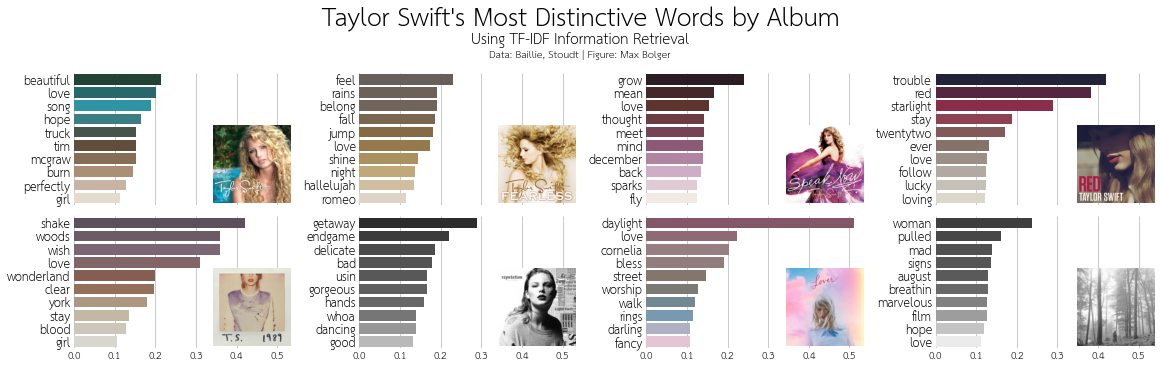

In [75]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2,4, sharex=True, figsize=(16,5), constrained_layout=True,facecolor='white',edgecolor='white')

fig.set_facecolor("white")

ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

taylor_swift = ['#1D4737', '#1C7476', '#1BA2B6', '#2D8891', '#45564B', 
             '#664D34', '#8E6C4E', '#B38E6D', '#CDB49C', '#E7DBCC']

fearless = ['#6B5E57','#706056','#756356','#81674A','#8F6C3B',
            '#A27B3E','#B99453','#CDAC6D','#D7C097','#E1D4C2']

speak_now = ['#2E1924','#492325','#652E26','#73343B','#7D3955', 
          '#945279','#B67EA5','#D4A7CA','#E4C7D5','#F5E8E2']

red = ['#201F39','#5C1E3F','#991E45', '#9A344C', '#875354', 
       '#897166', '#9F8E83', '#B4A99F', '#C9C0B4', '#DDD8C9'] 

o1989 = ['#5D4E5D','#6E5869','#7F6275','#886064','#8E5A49',
         '#9D6C51','#B4967C','#C8B9A1','#D0C8B8','#D8D8CF']

reputation =['#2C2C2C','#3C3C3C','#4C4C4C','#545454','#585858', 
             '#5F5F5F','#676767','#767676','#979797','#B9B9B9']

lover = ['#8C4F66','#936472','#9A7A7F','#947B78','#897569',
         '#7C7A74','#6C8B9A','#6F9CB9','#ADADC6','#EBBED3']

folklore = ['#3E3E3E','#474747','#515151','#565656','#5A5A5A', 
            '#686868','#818181','#9D9D9D','#C4C4C4','#EBEBEB'] 

sns.set_palette(sns.color_palette(taylor_swift))
sns.barplot(x='tfidf',y='index', data=vtaylorswift,palette=taylor_swift,ax=ax1)

ax9 = fig.add_axes([0.107,0.4475,0.215,0.215])
ax9.axis("off")
url_base = "https://upload.wikimedia.org/wikipedia/en/1/1f/Taylor_Swift_-_Taylor_Swift.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax9.imshow(img_base)

sns.set_palette(sns.color_palette(fearless))
sns.barplot(x='tfidf',y='index', data=vfearless,palette=fearless,ax=ax2)

ax10 = fig.add_axes([0.355,0.4475,0.215,0.215])
ax10.axis("off")
url_base = "https://upload.wikimedia.org/wikipedia/en/8/86/Taylor_Swift_-_Fearless.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax10.imshow(img_base)

sns.set_palette(sns.color_palette(speak_now))
sns.barplot(x='tfidf',y='index', data=vspeaknow,palette=speak_now,ax=ax3)

ax11 = fig.add_axes([0.605,0.4475,0.215,0.215])
ax11.axis("off")
url_base = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F4.bp.blogspot.com%2F_j7hHgrmn8V8%2FTGz7MMHh37I%2FAAAAAAAAFFQ%2FP1HCoaDsLLg%2Fs1600%2Fspeak%252Bnow.jpg&f=1&nofb=1"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax11.imshow(img_base)

sns.set_palette(sns.color_palette(red))
sns.barplot(x='tfidf',y='index', data=vred,palette=red,ax=ax4)

ax12 = fig.add_axes([0.8575,0.4475,0.215,0.215])
ax12.axis("off")
url_base = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcountrymusicrocks.net%2Fwp-content%2Fuploads%2F2012%2F08%2FTaylor-Swift-RED-CountryMusicRocks.net_.jpg&f=1&nofb=1"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax12.imshow(img_base)

sns.set_palette(sns.color_palette(o1989))
sns.barplot(x='tfidf',y='index', data=v1989,palette=o1989,ax=ax5)

ax13 = fig.add_axes([0.107,0.05,0.215,0.215])
ax13.axis("off")
url_base = "https://duckduckgo.com/i/a6533cc7.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax13.imshow(img_base)

sns.set_palette(sns.color_palette(reputation))
sns.barplot(x='tfidf',y='index', data=vreputation,palette=reputation,ax=ax6)

ax14 = fig.add_axes([0.355,0.05,0.215,0.215])
ax14.axis("off")
url_base = "https://duckduckgo.com/i/6a5f16f0.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax14.imshow(img_base)

sns.set_palette(sns.color_palette(lover))
sns.barplot(x='tfidf',y='index', data=vlover,palette=lover,ax=ax7)

ax15 = fig.add_axes([0.605,0.05,0.215,0.215])
ax15.axis("off")
url_base = "https://duckduckgo.com/i/af5605a1.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax15.imshow(img_base)

sns.set_palette(sns.color_palette(folklore))
sns.barplot(x='tfidf',y='index', data=vfolklore,palette=folklore,ax=ax8)

ax16 = fig.add_axes([0.8575,0.05,0.215,0.215])
ax16.axis("off")
url_base = "https://duckduckgo.com/i/51887687.png"
response_base = requests.get(url_base)
img_base = Image.open(BytesIO(response_base.content))
ax16.imshow(img_base)

for i in ax.flatten():
  i.set_xlabel('')
  i.set_ylabel('')
  i.tick_params(axis='y', labelsize=11.5)
  i.tick_params(axis='x', labelsize=10)
  i.set_facecolor("white")
  i.spines['right'].set_visible(False)
  i.spines['left'].set_visible(False)
  i.spines['top'].set_visible(False)
  i.spines['bottom'].set_visible(False)

plt.suptitle("Taylor Swift's Most Distinctive Words by Album\n",fontsize=24)

plt.figtext(0.5,.9,"Using TF-IDF Information Retrieval",fontsize=14, va='center',ha='center')

plt.figtext(0.5,.86,"Data: Baillie, Stoudt | Figure: Max Bolger",fontsize=10, va='center',ha='center')